In [55]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from matplotlib.widgets import Lasso
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [56]:
reviews_df = pd.read_csv('all_reviews.csv')

print(len(reviews_df))
print(reviews_df.columns)

63951
Index(['teacher_id', 'attendance', 'clarityColor', 'easyColor', 'helpColor',
       'helpCount', 'id', 'notHelpCount', 'onlineClass', 'quality', 'rClarity',
       'rClass', 'rComments', 'rDate', 'rEasy', 'rEasyString', 'rErrorMsg',
       'rHelpful', 'rInterest', 'rOverall', 'rOverallString', 'rStatus',
       'rTextBookUse', 'rTimestamp', 'rWouldTakeAgain', 'sId',
       'takenForCredit', 'teacher', 'teacherGrade', 'teacherRatingTags',
       'unUsefulGrouping', 'usefulGrouping', 'overall_rating'],
      dtype='object')


In [57]:
# dealing with null values

reviews_df = reviews_df.dropna(subset=['teacherGrade'])

reviews_df['onlineClass'] = reviews_df['onlineClass'].fillna('In person')
reviews_df['attendance'] = reviews_df['attendance'].fillna('Mandatory')
reviews_df['rWouldTakeAgain'] = reviews_df['rWouldTakeAgain'].fillna('No')
reviews_df['takenForCredit'] = reviews_df['takenForCredit'].fillna('Yes')
reviews_df['rInterest'] = reviews_df['rInterest'].fillna('Sorta interested')

print(reviews_df['rInterest'].unique())

grades = {'A+': 18, 'A': 17, 'A-': 16, 'B+': 15, 'B': 14, 'B-': 13, 'P': 12, 'C+': 11, 'C': 10, 'C-': 9, 'D+': 8, 'D': 7, 'D-': 6, 'F': 5, 'Not sure yet': 4, 'WD': 3, 'INC': 2, 'Audit/No Grade': 1}
interests = {"It's my life": 5, 'Really into it': 4, 'Sorta interested': 3, 'Low': 2, 'Meh': 1}
qualities = {'awesome': 5, 'good': 4, 'average': 3, 'poor': 2, 'awful': 1}
attendances = {'Mandatory': 2, 'Not Mandatory': 1}
wouldTakeAgain = {'Yes': 2, 'No': 1}
takenForCredit = {'Yes': 2, 'No': 1}


reviews_df['ratingHelpfulness'] = reviews_df['helpCount'] - reviews_df['notHelpCount']

# https://medium.com/analytics-vidhya/feature-engineering-for-machine-learning-e3c34d6c8055#:~:text=If%20a%20feature%20has%20lots,completely%20at%20random%20(MCAR)

print(len(reviews_df))

# show the number of null values in each column
print(reviews_df.isnull().sum())

['Sorta interested' 'Really into it' 'Meh' "It's my life" 'Low']
23869
teacher_id               0
attendance               0
clarityColor             0
easyColor                0
helpColor                0
helpCount                0
id                       0
notHelpCount             0
onlineClass              0
quality                  0
rClarity                 0
rClass                   0
rComments                0
rDate                    0
rEasy                    0
rEasyString              0
rErrorMsg            23869
rHelpful                 0
rInterest                0
rOverall                 0
rOverallString           0
rStatus                  0
rTextBookUse          1276
rTimestamp               0
rWouldTakeAgain          0
sId                      0
takenForCredit           0
teacher              23869
teacherGrade             0
teacherRatingTags        0
unUsefulGrouping         0
usefulGrouping           0
overall_rating          43
ratingHelpfulness        0
dtype: int6

In [58]:
# encoding

# https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

label_encoder = LabelEncoder()
reviews_df['onlineClass'] = label_encoder.fit_transform(reviews_df['onlineClass'])
reviews_df['teacherGrade'] = reviews_df['teacherGrade'].map(grades)
reviews_df['rInterest'] = reviews_df['rInterest'].map(interests)
reviews_df['quality'] = reviews_df['quality'].map(qualities)
reviews_df['attendance'] = reviews_df['attendance'].map(attendances)
reviews_df['rWouldTakeAgain'] = reviews_df['rWouldTakeAgain'].map(wouldTakeAgain)
reviews_df['takenForCredit'] = reviews_df['takenForCredit'].map(takenForCredit)

reviews_df = reviews_df.dropna(subset=['overall_rating']) # overall_rating
# reviews_df['rOverall'] = label_encoder.fit_transform(reviews_df['rOverall'])

# one hot encoding
# NOTE: doing one hot encoding (most likely not the best approach)
# https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769
# reviews_df = pd.get_dummies(reviews_df, columns=['attendance'], prefix = ['attendance'])
# reviews_df = pd.get_dummies(reviews_df, columns=['onlineClass'], prefix = ['onlineClass'])
# reviews_df = pd.get_dummies(reviews_df, columns=['rWouldTakeAgain'], prefix = ['rWouldTakeAgain'])
# reviews_df = pd.get_dummies(reviews_df, columns=['quality'], prefix = ['quality'])
# reviews_df = pd.get_dummies(reviews_df, columns=['teacherGrade'], prefix = ['teacherGrade'])
# reviews_df = pd.get_dummies(reviews_df, columns=['takenForCredit'], prefix = ['takenForCredit'])
# reviews_df = pd.get_dummies(reviews_df, columns=['rInterest'], prefix = ['rInterest'])

# do one hot encoding for teacherRatingTags column
reviews_df['teacherRatingTags'] = reviews_df['teacherRatingTags'].str.replace('[', '').str.replace(']', '').str.replace("'", '').str.strip().str.split(', ')
reviews_df = reviews_df.join(pd.get_dummies(reviews_df['teacherRatingTags'].apply(pd.Series).stack()).sum(level=0))
print(reviews_df.columns)

c:\Users\Mark\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


Index(['teacher_id', 'attendance', 'clarityColor', 'easyColor', 'helpColor',
       'helpCount', 'id', 'notHelpCount', 'onlineClass', 'quality', 'rClarity',
       'rClass', 'rComments', 'rDate', 'rEasy', 'rEasyString', 'rErrorMsg',
       'rHelpful', 'rInterest', 'rOverall', 'rOverallString', 'rStatus',
       'rTextBookUse', 'rTimestamp', 'rWouldTakeAgain', 'sId',
       'takenForCredit', 'teacher', 'teacherGrade', 'teacherRatingTags',
       'unUsefulGrouping', 'usefulGrouping', 'overall_rating',
       'ratingHelpfulness', '', 'Accessible outside class', 'Amazing lectures',
       'Amazing lectures ', 'Beware of pop quizzes', 'Caring',
       'Clear grading criteria', 'EXTRA CREDIT', 'Get ready to read',
       'Gives good feedback', 'Graded by few things', 'Group projects',
       'Hilarious', 'Inspirational', 'Lecture heavy', 'Lots of homework',
       'Online Savvy', 'Participation matters', 'Respected', 'So many papers',
       'Test heavy', 'Tough grader'],
      dtype='object

c:\Users\Mark\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().


In [59]:
# PCA
features = np.array(['attendance', 'onlineClass',
'rEasy', 'rWouldTakeAgain', 'teacherGrade', 'quality', 'rClarity', 'rHelpful', 'rInterest', 'takenForCredit', 'Accessible outside class', 'Amazing lectures', 'Amazing lectures ',
'Beware of pop quizzes', 'Caring', 'Clear grading criteria',
'EXTRA CREDIT', 'Get ready to read', 'Gives good feedback',
'Graded by few things', 'Group projects', 'Hilarious', 'Inspirational',
'Lecture heavy', 'Lots of homework', 'Online Savvy',
'Participation matters', 'Respected', 'So many papers', 'Test heavy',
'Tough grader'])





In [60]:
# make helpful column make review count more than others
# batch reviews from same prof

# use sentiment analysis to fill rInterest column
# order of the ordinal values are important not the values themselvees
# multivariate linear model
# are the beta non zero feature selection
# do feature clustering
# weighted reviews (feature clustering)
# is there a corrolation between features and output
# contingency table

# one hot encoding (not good)
# features = np.array(['Accessible outside class', 'Amazing lectures',
#        'Amazing lectures ', 'Beware of pop quizzes', 'Caring',
#        'Clear grading criteria', 'EXTRA CREDIT', 'Get ready to read',
#        'Gives good feedback', 'Graded by few things', 'Group projects',
#        'Hilarious', 'Inspirational', 'Lecture heavy', 'Lots of homework',
#        'Online Savvy', 'Participation matters', 'Respected', 'So many papers',
#        'Test heavy', 'Tough grader', 'attendance_Mandatory',
#        'attendance_Not Mandatory', 'onlineClass_online', 'rWouldTakeAgain_No',
#        'rWouldTakeAgain_Yes', 'quality_average', 'quality_awesome',
#        'quality_awful', 'quality_good', 'quality_poor', 'teacherGrade_A',
#        'teacherGrade_A+', 'teacherGrade_A-', 'teacherGrade_Audit/No Grade',
#        'teacherGrade_B', 'teacherGrade_B+', 'teacherGrade_B-',
#        'teacherGrade_C', 'teacherGrade_C+', 'teacherGrade_C-',
#        'teacherGrade_D', 'teacherGrade_D+', 'teacherGrade_D-',
#        'teacherGrade_F', 'teacherGrade_INC', 'teacherGrade_Not sure yet',
#        'teacherGrade_P', 'teacherGrade_WD', 'takenForCredit_No',
#        'takenForCredit_Yes', "rInterest_It's my life", 'rInterest_Low',
#        'rInterest_Meh', 'rInterest_Really into it',
#        'rInterest_Sorta interested'])

x = reviews_df[features]
y = reviews_df['overall_rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

classifiers = [RandomForestRegressor(), ExtraTreesRegressor(), XGBRegressor(), LinearRegression(), Ridge(), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), BaggingRegressor(), MLPRegressor()]
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    predictions = classifier.predict(x_test)

    # feature_importances = classifier.feature_importances_
    # feature_sorted = np.argsort(feature_importances)
    
    # padding = np.arange(len(features)) + 0.5
    # plt.barh(padding, feature_importances[feature_sorted], align='center')
    # plt.yticks(padding, features[feature_sorted])
    # plt.xlabel("Relative Importance")
    # plt.title("Variable Importance")
    # plt.show()

    print(str(classifier).split('(')[0], ": ", classifier.score(x_test, y_test))

# other models: https://scikit-learn.org/stable/modules/feature_selection.html

RandomForestRegressor :  0.211892369622519


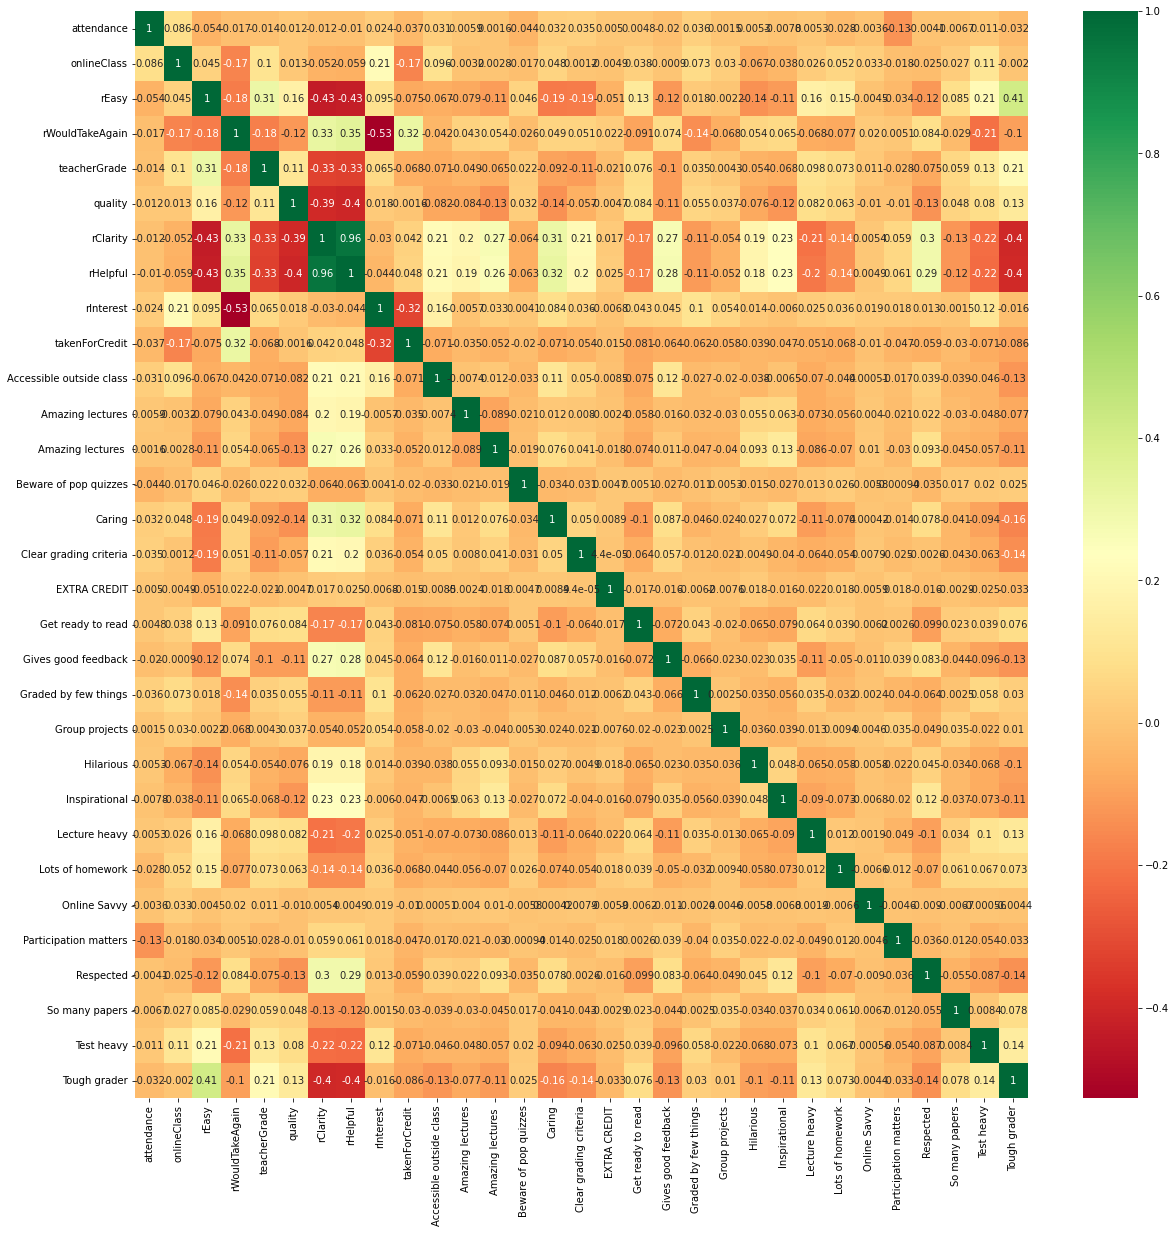

In [ ]:
corr_matrix = reviews_df[features].corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(reviews_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")